Edoardo Merli edoardo.merli@studio.unibo.it

In [57]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ParameterGrid

random_state = 42

1. Load

In [6]:
file = 'exam_2021_02_17_data.csv'
df = pd.read_csv(file, delimiter='\t')

In [14]:
df.head()

,F0,F1,F2
0,d,a,a
1,c,e,c
2,j,a,c
3,f,e,j
4,c,e,d


In [28]:
data = {}
for col in df.columns:
    data[col] = list(np.unique(df[col], return_counts=True)[1])
pd.DataFrame(data=data, index=np.unique(df['F0']))

,F0,F1,F2
a,100,100,100
b,100,99,99
c,100,100,100
d,100,100,100
e,100,101,101
f,100,100,100
g,100,100,100
h,100,100,100
i,100,100,100
j,100,100,100


2.

Since the values are nominal and we want to use sklearn clustering algorithms to work with numerical values, we use OneHotEncoding to obtain binary representations

In [25]:
enc = OneHotEncoder(sparse=False)
X = enc.fit_transform(df)

3.

In [36]:
def deviation_index(n_clusters, y):
    return np.sqrt((np.unique(y, return_counts=True)[1]).var())/n_clusters

In [37]:
distorsions = []
silhouette_scores = []
deviations = []

k_range = list(range(2, 16))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state, init="k-means++", n_init=10, max_iter=300)
    y_km = kmeans.fit_predict(X)
    distorsions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, y_km))
    deviations.append(deviation_index(k, y_km))

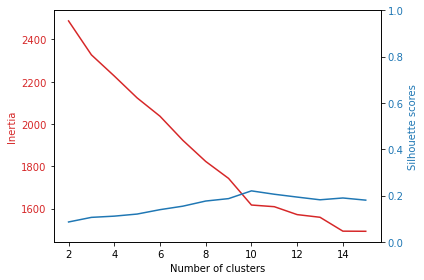

In [44]:
fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color1)
ax1.plot(k_range, distorsions, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()

color2 ='tab:blue'
ax2.set_ylabel('Silhouette scores', color=color2)
ax2.plot(k_range, silhouette_scores, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0,1)

fig.tight_layout()
plt.show()

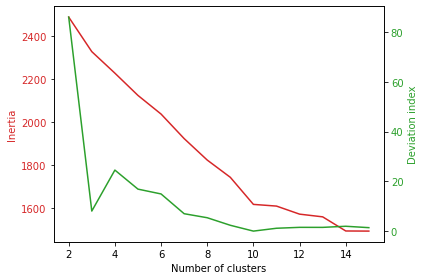

In [45]:
fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color1)
ax1.plot(k_range, distorsions, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax3 = ax1.twinx()

color3 ='tab:green'
ax3.set_ylabel('Deviation index', color=color3)
ax3.plot(k_range, deviations, color=color3)
ax3.tick_params(axis='y', labelcolor=color3)


fig.tight_layout()
plt.show()

From the 2 plots, at K=10 we have a maximum in the silhouette score, a minimum for the deviation index and an elbow point for the deviation index

In [46]:
best_k = 10

In [47]:
kmeans = KMeans(n_clusters=best_k, random_state=random_state, init="k-means++", n_init=10, max_iter=300)
y_km = kmeans.fit_predict(X)
distorsion_km = kmeans.inertia_
silhouette_scores_km = silhouette_score(X, y_km)
deviation_km = deviation_index(k, y_km)

In [48]:
print(distorsion_km, silhouette_scores_km, deviation_km)

1617.1127052705267 0.22010914059970288 0.029814239699997195


5.

In [53]:
from sklearn.cluster import DBSCAN

In [74]:
n_clusters = []

epsilons = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
min_samples = list(range(2, 30))
for eps in epsilons:
    for ms in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        y_km = dbscan.fit_predict(X)
        # distorsions.append(dbscan)
        nc = len(np.unique(y_km))
        n_clusters.append(nc)
        if nc in [8, 9, 10, 11, 12]:
            print(eps, ms, nc)

0.0001 9 8
0.001 9 8
0.01 9 8
0.1 9 8
1 9 8


In [69]:
10 in n_clusters

False

In [75]:
dbscan = DBSCAN(eps=0.01, min_samples=9)

In [76]:
y_db = dbscan.fit_predict(X)

In [77]:
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import adjusted_rand_score

In [79]:
pair_confusion_matrix(y_km, y_db)

array([[     0,      0],
       [130708, 868292]], dtype=int64)

In [81]:
print(adjusted_rand_score(y_km, y_db))

0.0
